In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [113]:
XORdata=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
X=XORdata[:,0:2]
y=XORdata[:,-1]
print(X)
X=np.reshape(X,(4,2))
Y=np.ones((4,2),np.int8)
Y[0:4,0]=np.asarray(y)
Y[0,1]=1
Y[1,1]=0
Y[2,1]=0
Y[3,1]=1
print(Y)
def sigmoid(x):
   y=np.exp(-1*x)+1
   y=1/y
   #print(y)
   return y
def sigmoid_deriv(x):
    return x*(1-x)
def network():
     
     Layer1={'Layer':'Input','val':[]}
     Layer2={'Layer':'Hidden_one','val':[],'weight':np.ones((3,2),np.float64),'delta':np.zeros((3),np.float64)}
     Layer3={'Layer':'Output','val':[],'weight':np.ones((2,3),np.float64),'delta':np.zeros((2),np.float64)}
     net=[Layer1,Layer2,Layer3]
     return net


def for_prop(Layer,row):
     val=Layer['val']
     weight=Layer['weight']
     delta=Layer['delta']
     val=np.dot(weight,row)
     val=sigmoid(val)
     Layer['val']=val
     return val
#ret=for_prop(net['Layer2'],X[0])
#ret=for_prop(net['Layer3'],ret)


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0 1]
 [1 0]
 [1 0]
 [0 1]]


In [114]:
net=network()
res=[]
error_log=np.zeros((10000),np.float64)
epoc_val=np.zeros((10000),np.float64)
for epoc in range(1,10000):
 
 for i in range (0,4):
    err=0
    for j in range(len(net)):
         Layer=net[j]
         
         #print('FP',Layer['Layer'])
         if Layer['Layer']=='Input':
            Layer['val']=X[i]
         else:
           Prev_Layer=net[j-1]
           val=np.dot(Layer['weight'],Prev_Layer['val'])
           val=sigmoid(val)
           Layer['val']=val
           data=val
           Layer['delta']=sigmoid_deriv(val)
 
    for j in reversed(range(len(net))):
    
        Layer=net[j]
        #print('BP',Layer['Layer'])
        error=[]
        if Layer['Layer']=='Input':
            break
    
        if Layer['Layer']=='Output':
           error=Y[i]-Layer['val']
           err=error
           #print(i)
           #print(X[i])
           #print(Y[i])
           #print(Layer['val'])
           #print(error)
           
           
        else :
           Next_Layer=net[j+1]
           weights=np.asarray(Next_Layer['weight']).T
           delta=np.asarray(Next_Layer['delta'])
           for w in range(len(weights)):
                de=0
                for k in range(len(delta)):
                    de+=weights[w,k]*delta[k]
           error.append(de)
        error=np.asarray(error)   
        deriv=sigmoid_deriv(Layer['val'])
        Layer['delta']=error*deriv
        
        #print('error',error)
        #print('delta',Layer['delta'])
    #print(Layer['val'])
    #print(Layer['weight'])
    #print(Layer['delta'])
    
    for j in range(1,3):
        Layer=net[j]
        Prev_Layer=net[j-1]
        #print('UW',Layer['Layer'])
        if Layer['Layer']!='Input':
            weights=np.asarray(Layer['weight'])
            data=np.asarray(Prev_Layer['val'])
            for w in range(len(weights)):
             for d in range(len(data)):
                g=(0.05*Layer['delta'].T[w]*data[d])
                weights[w,d]+=np.asarray(g)
                #print('weights[w]',weights[w])
            Layer['weight']=weights
        #print('weight',Layer['weight'])
        #Layer['weight']=weights
        #print(Layer['weight'])
        #print(weights[w])
 error_log[epoc-1]=err[0]+err[1]
 
 epoc_val[epoc-1]=epoc
 print(epoc)       
 print(err)
epoc_val[epoc]=epoc
error_log[epoc]=err[0]+err[1]
print(error_log)



1
[-0.93312161  0.0673559 ]
2
[-0.93226318  0.06824989]
3
[-0.93139062  0.06916062]
4
[-0.93050367  0.07008845]
5
[-0.9296021   0.07103373]
6
[-0.92868565  0.07199681]
7
[-0.92775409  0.07297806]
8
[-0.92680715  0.07397785]
9
[-0.92584459  0.07499655]
10
[-0.92486614  0.07603454]
11
[-0.92387155  0.07709221]
12
[-0.92286057  0.07816994]
13
[-0.92183292  0.07926814]
14
[-0.92078835  0.0803872 ]
15
[-0.91972659  0.08152753]
16
[-0.91864738  0.08268953]
17
[-0.91755044  0.08387361]
18
[-0.91643552  0.08508019]
19
[-0.91530234  0.0863097 ]
20
[-0.91415063  0.08756254]
21
[-0.91298013  0.08883916]
22
[-0.91179057  0.09013996]
23
[-0.91058168  0.09146538]
24
[-0.90935319  0.09281585]
25
[-0.90810485  0.0941918 ]
26
[-0.90683638  0.09559365]
27
[-0.90554752  0.09702184]
28
[-0.90423801  0.09847679]
29
[-0.9029076   0.09995893]
30
[-0.90155603  0.10146867]
31
[-0.90018306  0.10300645]
32
[-0.89878843  0.10457266]
33
[-0.8973719   0.10616773]
34
[-0.89593324  0.10779205]
35
[-0.89447222  0.1094

328
[-0.52069683  0.51206732]
329
[-0.52061168  0.51214028]
330
[-0.52052808  0.51221191]
331
[-0.52044602  0.51228222]
332
[-0.52036546  0.51235125]
333
[-0.52028637  0.51241902]
334
[-0.52020874  0.51248554]
335
[-0.52013253  0.51255085]
336
[-0.52005771  0.51261497]
337
[-0.51998427  0.51267791]
338
[-0.51991218  0.5127397 ]
339
[-0.5198414   0.51280036]
340
[-0.51977193  0.51285992]
341
[-0.51970373  0.51291838]
342
[-0.51963678  0.51297578]
343
[-0.51957106  0.51303212]
344
[-0.51950655  0.51308744]
345
[-0.51944322  0.51314175]
346
[-0.51938105  0.51319506]
347
[-0.51932003  0.5132474 ]
348
[-0.51926012  0.51329878]
349
[-0.51920132  0.51334923]
350
[-0.51914359  0.51339875]
351
[-0.51908693  0.51344737]
352
[-0.5190313   0.51349511]
353
[-0.5189767   0.51354197]
354
[-0.5189231   0.51358797]
355
[-0.51887049  0.51363314]
356
[-0.51881884  0.51367748]
357
[-0.51876815  0.51372101]
358
[-0.51871838  0.51376375]
359
[-0.51866953  0.51380571]
360
[-0.51862158  0.5138469 ]
361
[-0.51

638
[-0.51612099  0.51609318]
639
[-0.51612096  0.51609366]
640
[-0.51612093  0.51609413]
641
[-0.5161209  0.5160946]
642
[-0.51612089  0.51609506]
643
[-0.51612087  0.51609552]
644
[-0.51612086  0.51609598]
645
[-0.51612086  0.51609643]
646
[-0.51612086  0.51609688]
647
[-0.51612086  0.51609732]
648
[-0.51612087  0.51609776]
649
[-0.51612089  0.5160982 ]
650
[-0.5161209   0.51609863]
651
[-0.51612092  0.51609906]
652
[-0.51612095  0.51609949]
653
[-0.51612098  0.51609991]
654
[-0.51612101  0.51610033]
655
[-0.51612105  0.51610075]
656
[-0.51612109  0.51610116]
657
[-0.51612114  0.51610158]
658
[-0.51612119  0.51610198]
659
[-0.51612124  0.51610239]
660
[-0.51612129  0.51610279]
661
[-0.51612135  0.51610319]
662
[-0.51612141  0.51610358]
663
[-0.51612148  0.51610398]
664
[-0.51612155  0.51610437]
665
[-0.51612162  0.51610475]
666
[-0.5161217   0.51610514]
667
[-0.51612178  0.51610552]
668
[-0.51612186  0.5161059 ]
669
[-0.51612194  0.51610628]
670
[-0.51612203  0.51610665]
671
[-0.5161

926
[-0.51617653  0.5161764 ]
927
[-0.51617678  0.51617665]
928
[-0.51617702  0.51617689]
929
[-0.51617727  0.51617714]
930
[-0.51617752  0.51617739]
931
[-0.51617776  0.51617764]
932
[-0.51617801  0.51617789]
933
[-0.51617825  0.51617814]
934
[-0.5161785   0.51617838]
935
[-0.51617875  0.51617863]
936
[-0.51617899  0.51617888]
937
[-0.51617924  0.51617913]
938
[-0.51617949  0.51617938]
939
[-0.51617973  0.51617963]
940
[-0.51617998  0.51617988]
941
[-0.51618022  0.51618012]
942
[-0.51618047  0.51618037]
943
[-0.51618072  0.51618062]
944
[-0.51618096  0.51618087]
945
[-0.51618121  0.51618112]
946
[-0.51618146  0.51618137]
947
[-0.5161817   0.51618161]
948
[-0.51618195  0.51618186]
949
[-0.5161822   0.51618211]
950
[-0.51618245  0.51618236]
951
[-0.51618269  0.51618261]
952
[-0.51618294  0.51618286]
953
[-0.51618319  0.5161831 ]
954
[-0.51618343  0.51618335]
955
[-0.51618368  0.5161836 ]
956
[-0.51618393  0.51618385]
957
[-0.51618417  0.5161841 ]
958
[-0.51618442  0.51618435]
959
[-0.51

1198
[-0.51624437  0.51624437]
1199
[-0.51624462  0.51624462]
1200
[-0.51624487  0.51624487]
1201
[-0.51624512  0.51624512]
1202
[-0.51624538  0.51624538]
1203
[-0.51624563  0.51624563]
1204
[-0.51624588  0.51624588]
1205
[-0.51624613  0.51624613]
1206
[-0.51624638  0.51624638]
1207
[-0.51624664  0.51624664]
1208
[-0.51624689  0.51624689]
1209
[-0.51624714  0.51624714]
1210
[-0.51624739  0.51624739]
1211
[-0.51624765  0.51624765]
1212
[-0.5162479  0.5162479]
1213
[-0.51624815  0.51624815]
1214
[-0.5162484  0.5162484]
1215
[-0.51624865  0.51624865]
1216
[-0.51624891  0.51624891]
1217
[-0.51624916  0.51624916]
1218
[-0.51624941  0.51624941]
1219
[-0.51624966  0.51624966]
1220
[-0.51624992  0.51624992]
1221
[-0.51625017  0.51625017]
1222
[-0.51625042  0.51625042]
1223
[-0.51625067  0.51625067]
1224
[-0.51625093  0.51625093]
1225
[-0.51625118  0.51625118]
1226
[-0.51625143  0.51625143]
1227
[-0.51625168  0.51625168]
1228
[-0.51625194  0.51625194]
1229
[-0.51625219  0.51625219]
1230
[-0.516

1464
[-0.51631205  0.51631205]
1465
[-0.5163123  0.5163123]
1466
[-0.51631256  0.51631256]
1467
[-0.51631282  0.51631282]
1468
[-0.51631308  0.51631308]
1469
[-0.51631333  0.51631333]
1470
[-0.51631359  0.51631359]
1471
[-0.51631385  0.51631385]
1472
[-0.5163141  0.5163141]
1473
[-0.51631436  0.51631436]
1474
[-0.51631462  0.51631462]
1475
[-0.51631487  0.51631487]
1476
[-0.51631513  0.51631513]
1477
[-0.51631539  0.51631539]
1478
[-0.51631565  0.51631565]
1479
[-0.5163159  0.5163159]
1480
[-0.51631616  0.51631616]
1481
[-0.51631642  0.51631642]
1482
[-0.51631667  0.51631667]
1483
[-0.51631693  0.51631693]
1484
[-0.51631719  0.51631719]
1485
[-0.51631745  0.51631745]
1486
[-0.5163177  0.5163177]
1487
[-0.51631796  0.51631796]
1488
[-0.51631822  0.51631822]
1489
[-0.51631847  0.51631847]
1490
[-0.51631873  0.51631873]
1491
[-0.51631899  0.51631899]
1492
[-0.51631925  0.51631925]
1493
[-0.5163195  0.5163195]
1494
[-0.51631976  0.51631976]
1495
[-0.51632002  0.51632002]
1496
[-0.51632028 

1775
[-0.51639281  0.51639281]
1776
[-0.51639308  0.51639308]
1777
[-0.51639334  0.51639334]
1778
[-0.5163936  0.5163936]
1779
[-0.51639386  0.51639386]
1780
[-0.51639413  0.51639413]
1781
[-0.51639439  0.51639439]
1782
[-0.51639465  0.51639465]
1783
[-0.51639492  0.51639492]
1784
[-0.51639518  0.51639518]
1785
[-0.51639544  0.51639544]
1786
[-0.5163957  0.5163957]
1787
[-0.51639597  0.51639597]
1788
[-0.51639623  0.51639623]
1789
[-0.51639649  0.51639649]
1790
[-0.51639676  0.51639676]
1791
[-0.51639702  0.51639702]
1792
[-0.51639728  0.51639728]
1793
[-0.51639754  0.51639754]
1794
[-0.51639781  0.51639781]
1795
[-0.51639807  0.51639807]
1796
[-0.51639833  0.51639833]
1797
[-0.5163986  0.5163986]
1798
[-0.51639886  0.51639886]
1799
[-0.51639912  0.51639912]
1800
[-0.51639938  0.51639938]
1801
[-0.51639965  0.51639965]
1802
[-0.51639991  0.51639991]
1803
[-0.51640017  0.51640017]
1804
[-0.51640044  0.51640044]
1805
[-0.5164007  0.5164007]
1806
[-0.51640096  0.51640096]
1807
[-0.5164012

2068
[-0.51647056  0.51647056]
2069
[-0.51647083  0.51647083]
2070
[-0.5164711  0.5164711]
2071
[-0.51647137  0.51647137]
2072
[-0.51647164  0.51647164]
2073
[-0.5164719  0.5164719]
2074
[-0.51647217  0.51647217]
2075
[-0.51647244  0.51647244]
2076
[-0.51647271  0.51647271]
2077
[-0.51647298  0.51647298]
2078
[-0.51647325  0.51647325]
2079
[-0.51647351  0.51647351]
2080
[-0.51647378  0.51647378]
2081
[-0.51647405  0.51647405]
2082
[-0.51647432  0.51647432]
2083
[-0.51647459  0.51647459]
2084
[-0.51647486  0.51647486]
2085
[-0.51647512  0.51647512]
2086
[-0.51647539  0.51647539]
2087
[-0.51647566  0.51647566]
2088
[-0.51647593  0.51647593]
2089
[-0.5164762  0.5164762]
2090
[-0.51647647  0.51647647]
2091
[-0.51647674  0.51647674]
2092
[-0.516477  0.516477]
2093
[-0.51647727  0.51647727]
2094
[-0.51647754  0.51647754]
2095
[-0.51647781  0.51647781]
2096
[-0.51647808  0.51647808]
2097
[-0.51647835  0.51647835]
2098
[-0.51647862  0.51647862]
2099
[-0.51647888  0.51647888]
2100
[-0.51647915 

2350
[-0.51654695  0.51654695]
2351
[-0.51654723  0.51654723]
2352
[-0.5165475  0.5165475]
2353
[-0.51654777  0.51654777]
2354
[-0.51654805  0.51654805]
2355
[-0.51654832  0.51654832]
2356
[-0.51654859  0.51654859]
2357
[-0.51654887  0.51654887]
2358
[-0.51654914  0.51654914]
2359
[-0.51654942  0.51654942]
2360
[-0.51654969  0.51654969]
2361
[-0.51654996  0.51654996]
2362
[-0.51655024  0.51655024]
2363
[-0.51655051  0.51655051]
2364
[-0.51655078  0.51655078]
2365
[-0.51655106  0.51655106]
2366
[-0.51655133  0.51655133]
2367
[-0.51655161  0.51655161]
2368
[-0.51655188  0.51655188]
2369
[-0.51655215  0.51655215]
2370
[-0.51655243  0.51655243]
2371
[-0.5165527  0.5165527]
2372
[-0.51655298  0.51655298]
2373
[-0.51655325  0.51655325]
2374
[-0.51655353  0.51655353]
2375
[-0.5165538  0.5165538]
2376
[-0.51655407  0.51655407]
2377
[-0.51655435  0.51655435]
2378
[-0.51655462  0.51655462]
2379
[-0.5165549  0.5165549]
2380
[-0.51655517  0.51655517]
2381
[-0.51655544  0.51655544]
2382
[-0.5165557

2657
[-0.5166319  0.5166319]
2658
[-0.51663218  0.51663218]
2659
[-0.51663246  0.51663246]
2660
[-0.51663274  0.51663274]
2661
[-0.51663302  0.51663302]
2662
[-0.5166333  0.5166333]
2663
[-0.51663358  0.51663358]
2664
[-0.51663386  0.51663386]
2665
[-0.51663414  0.51663414]
2666
[-0.51663442  0.51663442]
2667
[-0.5166347  0.5166347]
2668
[-0.51663498  0.51663498]
2669
[-0.51663526  0.51663526]
2670
[-0.51663554  0.51663554]
2671
[-0.51663582  0.51663582]
2672
[-0.5166361  0.5166361]
2673
[-0.51663638  0.51663638]
2674
[-0.51663666  0.51663666]
2675
[-0.51663694  0.51663694]
2676
[-0.51663722  0.51663722]
2677
[-0.5166375  0.5166375]
2678
[-0.51663778  0.51663778]
2679
[-0.51663806  0.51663806]
2680
[-0.51663834  0.51663834]
2681
[-0.51663862  0.51663862]
2682
[-0.5166389  0.5166389]
2683
[-0.51663918  0.51663918]
2684
[-0.51663946  0.51663946]
2685
[-0.51663974  0.51663974]
2686
[-0.51664002  0.51664002]
2687
[-0.5166403  0.5166403]
2688
[-0.51664058  0.51664058]
2689
[-0.51664086  0.5

2938
[-0.51671133  0.51671133]
2939
[-0.51671162  0.51671162]
2940
[-0.5167119  0.5167119]
2941
[-0.51671219  0.51671219]
2942
[-0.51671247  0.51671247]
2943
[-0.51671276  0.51671276]
2944
[-0.51671305  0.51671305]
2945
[-0.51671333  0.51671333]
2946
[-0.51671362  0.51671362]
2947
[-0.5167139  0.5167139]
2948
[-0.51671419  0.51671419]
2949
[-0.51671447  0.51671447]
2950
[-0.51671476  0.51671476]
2951
[-0.51671505  0.51671505]
2952
[-0.51671533  0.51671533]
2953
[-0.51671562  0.51671562]
2954
[-0.5167159  0.5167159]
2955
[-0.51671619  0.51671619]
2956
[-0.51671648  0.51671648]
2957
[-0.51671676  0.51671676]
2958
[-0.51671705  0.51671705]
2959
[-0.51671733  0.51671733]
2960
[-0.51671762  0.51671762]
2961
[-0.51671791  0.51671791]
2962
[-0.51671819  0.51671819]
2963
[-0.51671848  0.51671848]
2964
[-0.51671876  0.51671876]
2965
[-0.51671905  0.51671905]
2966
[-0.51671934  0.51671934]
2967
[-0.51671962  0.51671962]
2968
[-0.51671991  0.51671991]
2969
[-0.51672019  0.51672019]
2970
[-0.51672

[-0.51679941  0.51679941]
3244
[-0.5167997  0.5167997]
3245
[-0.5168  0.5168]
3246
[-0.51680029  0.51680029]
3247
[-0.51680058  0.51680058]
3248
[-0.51680087  0.51680087]
3249
[-0.51680117  0.51680117]
3250
[-0.51680146  0.51680146]
3251
[-0.51680175  0.51680175]
3252
[-0.51680204  0.51680204]
3253
[-0.51680233  0.51680233]
3254
[-0.51680263  0.51680263]
3255
[-0.51680292  0.51680292]
3256
[-0.51680321  0.51680321]
3257
[-0.5168035  0.5168035]
3258
[-0.5168038  0.5168038]
3259
[-0.51680409  0.51680409]
3260
[-0.51680438  0.51680438]
3261
[-0.51680467  0.51680467]
3262
[-0.51680497  0.51680497]
3263
[-0.51680526  0.51680526]
3264
[-0.51680555  0.51680555]
3265
[-0.51680584  0.51680584]
3266
[-0.51680614  0.51680614]
3267
[-0.51680643  0.51680643]
3268
[-0.51680672  0.51680672]
3269
[-0.51680701  0.51680701]
3270
[-0.51680731  0.51680731]
3271
[-0.5168076  0.5168076]
3272
[-0.51680789  0.51680789]
3273
[-0.51680818  0.51680818]
3274
[-0.51680848  0.51680848]
3275
[-0.51680877  0.51680877

3531
[-0.51688441  0.51688441]
3532
[-0.51688471  0.51688471]
3533
[-0.51688501  0.51688501]
3534
[-0.51688531  0.51688531]
3535
[-0.51688561  0.51688561]
3536
[-0.51688591  0.51688591]
3537
[-0.5168862  0.5168862]
3538
[-0.5168865  0.5168865]
3539
[-0.5168868  0.5168868]
3540
[-0.5168871  0.5168871]
3541
[-0.5168874  0.5168874]
3542
[-0.5168877  0.5168877]
3543
[-0.516888  0.516888]
3544
[-0.51688829  0.51688829]
3545
[-0.51688859  0.51688859]
3546
[-0.51688889  0.51688889]
3547
[-0.51688919  0.51688919]
3548
[-0.51688949  0.51688949]
3549
[-0.51688979  0.51688979]
3550
[-0.51689009  0.51689009]
3551
[-0.51689038  0.51689038]
3552
[-0.51689068  0.51689068]
3553
[-0.51689098  0.51689098]
3554
[-0.51689128  0.51689128]
3555
[-0.51689158  0.51689158]
3556
[-0.51689188  0.51689188]
3557
[-0.51689218  0.51689218]
3558
[-0.51689248  0.51689248]
3559
[-0.51689278  0.51689278]
3560
[-0.51689307  0.51689307]
3561
[-0.51689337  0.51689337]
3562
[-0.51689367  0.51689367]
3563
[-0.51689397  0.516

3808
[-0.51696789  0.51696789]
3809
[-0.5169682  0.5169682]
3810
[-0.5169685  0.5169685]
3811
[-0.51696881  0.51696881]
3812
[-0.51696911  0.51696911]
3813
[-0.51696942  0.51696942]
3814
[-0.51696972  0.51696972]
3815
[-0.51697002  0.51697002]
3816
[-0.51697033  0.51697033]
3817
[-0.51697063  0.51697063]
3818
[-0.51697094  0.51697094]
3819
[-0.51697124  0.51697124]
3820
[-0.51697155  0.51697155]
3821
[-0.51697185  0.51697185]
3822
[-0.51697216  0.51697216]
3823
[-0.51697246  0.51697246]
3824
[-0.51697277  0.51697277]
3825
[-0.51697307  0.51697307]
3826
[-0.51697338  0.51697338]
3827
[-0.51697368  0.51697368]
3828
[-0.51697399  0.51697399]
3829
[-0.51697429  0.51697429]
3830
[-0.5169746  0.5169746]
3831
[-0.5169749  0.5169749]
3832
[-0.51697521  0.51697521]
3833
[-0.51697551  0.51697551]
3834
[-0.51697582  0.51697582]
3835
[-0.51697612  0.51697612]
3836
[-0.51697643  0.51697643]
3837
[-0.51697673  0.51697673]
3838
[-0.51697704  0.51697704]
3839
[-0.51697734  0.51697734]
3840
[-0.5169776

4114
[-0.51706213  0.51706213]
4115
[-0.51706244  0.51706244]
4116
[-0.51706275  0.51706275]
4117
[-0.51706306  0.51706306]
4118
[-0.51706337  0.51706337]
4119
[-0.51706369  0.51706369]
4120
[-0.517064  0.517064]
4121
[-0.51706431  0.51706431]
4122
[-0.51706462  0.51706462]
4123
[-0.51706493  0.51706493]
4124
[-0.51706524  0.51706524]
4125
[-0.51706556  0.51706556]
4126
[-0.51706587  0.51706587]
4127
[-0.51706618  0.51706618]
4128
[-0.51706649  0.51706649]
4129
[-0.5170668  0.5170668]
4130
[-0.51706711  0.51706711]
4131
[-0.51706743  0.51706743]
4132
[-0.51706774  0.51706774]
4133
[-0.51706805  0.51706805]
4134
[-0.51706836  0.51706836]
4135
[-0.51706867  0.51706867]
4136
[-0.51706899  0.51706899]
4137
[-0.5170693  0.5170693]
4138
[-0.51706961  0.51706961]
4139
[-0.51706992  0.51706992]
4140
[-0.51707023  0.51707023]
4141
[-0.51707055  0.51707055]
4142
[-0.51707086  0.51707086]
4143
[-0.51707117  0.51707117]
4144
[-0.51707148  0.51707148]
4145
[-0.51707179  0.51707179]
4146
[-0.5170721

[-0.51716205  0.51716205]
4432
[-0.51716236  0.51716236]
4433
[-0.51716268  0.51716268]
4434
[-0.517163  0.517163]
4435
[-0.51716332  0.51716332]
4436
[-0.51716364  0.51716364]
4437
[-0.51716396  0.51716396]
4438
[-0.51716428  0.51716428]
4439
[-0.5171646  0.5171646]
4440
[-0.51716492  0.51716492]
4441
[-0.51716524  0.51716524]
4442
[-0.51716556  0.51716556]
4443
[-0.51716587  0.51716587]
4444
[-0.51716619  0.51716619]
4445
[-0.51716651  0.51716651]
4446
[-0.51716683  0.51716683]
4447
[-0.51716715  0.51716715]
4448
[-0.51716747  0.51716747]
4449
[-0.51716779  0.51716779]
4450
[-0.51716811  0.51716811]
4451
[-0.51716843  0.51716843]
4452
[-0.51716875  0.51716875]
4453
[-0.51716907  0.51716907]
4454
[-0.51716939  0.51716939]
4455
[-0.51716971  0.51716971]
4456
[-0.51717003  0.51717003]
4457
[-0.51717035  0.51717035]
4458
[-0.51717067  0.51717067]
4459
[-0.51717099  0.51717099]
4460
[-0.51717131  0.51717131]
4461
[-0.51717162  0.51717162]
4462
[-0.51717194  0.51717194]
4463
[-0.51717226  

4723
[-0.51725621  0.51725621]
4724
[-0.51725654  0.51725654]
4725
[-0.51725686  0.51725686]
4726
[-0.51725719  0.51725719]
4727
[-0.51725751  0.51725751]
4728
[-0.51725784  0.51725784]
4729
[-0.51725817  0.51725817]
4730
[-0.51725849  0.51725849]
4731
[-0.51725882  0.51725882]
4732
[-0.51725915  0.51725915]
4733
[-0.51725947  0.51725947]
4734
[-0.5172598  0.5172598]
4735
[-0.51726012  0.51726012]
4736
[-0.51726045  0.51726045]
4737
[-0.51726078  0.51726078]
4738
[-0.5172611  0.5172611]
4739
[-0.51726143  0.51726143]
4740
[-0.51726176  0.51726176]
4741
[-0.51726208  0.51726208]
4742
[-0.51726241  0.51726241]
4743
[-0.51726274  0.51726274]
4744
[-0.51726306  0.51726306]
4745
[-0.51726339  0.51726339]
4746
[-0.51726372  0.51726372]
4747
[-0.51726404  0.51726404]
4748
[-0.51726437  0.51726437]
4749
[-0.5172647  0.5172647]
4750
[-0.51726502  0.51726502]
4751
[-0.51726535  0.51726535]
4752
[-0.51726568  0.51726568]
4753
[-0.517266  0.517266]
4754
[-0.51726633  0.51726633]
4755
[-0.51726666 

5006
[-0.51734947  0.51734947]
5007
[-0.5173498  0.5173498]
5008
[-0.51735014  0.51735014]
5009
[-0.51735047  0.51735047]
5010
[-0.5173508  0.5173508]
5011
[-0.51735114  0.51735114]
5012
[-0.51735147  0.51735147]
5013
[-0.5173518  0.5173518]
5014
[-0.51735214  0.51735214]
5015
[-0.51735247  0.51735247]
5016
[-0.5173528  0.5173528]
5017
[-0.51735314  0.51735314]
5018
[-0.51735347  0.51735347]
5019
[-0.5173538  0.5173538]
5020
[-0.51735414  0.51735414]
5021
[-0.51735447  0.51735447]
5022
[-0.5173548  0.5173548]
5023
[-0.51735514  0.51735514]
5024
[-0.51735547  0.51735547]
5025
[-0.5173558  0.5173558]
5026
[-0.51735614  0.51735614]
5027
[-0.51735647  0.51735647]
5028
[-0.51735681  0.51735681]
5029
[-0.51735714  0.51735714]
5030
[-0.51735747  0.51735747]
5031
[-0.51735781  0.51735781]
5032
[-0.51735814  0.51735814]
5033
[-0.51735847  0.51735847]
5034
[-0.51735881  0.51735881]
5035
[-0.51735914  0.51735914]
5036
[-0.51735948  0.51735948]
5037
[-0.51735981  0.51735981]
5038
[-0.51736014  0.5

5317
[-0.51745429  0.51745429]
5318
[-0.51745463  0.51745463]
5319
[-0.51745497  0.51745497]
5320
[-0.51745532  0.51745532]
5321
[-0.51745566  0.51745566]
5322
[-0.517456  0.517456]
5323
[-0.51745634  0.51745634]
5324
[-0.51745668  0.51745668]
5325
[-0.51745702  0.51745702]
5326
[-0.51745736  0.51745736]
5327
[-0.5174577  0.5174577]
5328
[-0.51745805  0.51745805]
5329
[-0.51745839  0.51745839]
5330
[-0.51745873  0.51745873]
5331
[-0.51745907  0.51745907]
5332
[-0.51745941  0.51745941]
5333
[-0.51745975  0.51745975]
5334
[-0.51746009  0.51746009]
5335
[-0.51746044  0.51746044]
5336
[-0.51746078  0.51746078]
5337
[-0.51746112  0.51746112]
5338
[-0.51746146  0.51746146]
5339
[-0.5174618  0.5174618]
5340
[-0.51746214  0.51746214]
5341
[-0.51746249  0.51746249]
5342
[-0.51746283  0.51746283]
5343
[-0.51746317  0.51746317]
5344
[-0.51746351  0.51746351]
5345
[-0.51746385  0.51746385]
5346
[-0.51746419  0.51746419]
5347
[-0.51746454  0.51746454]
5348
[-0.51746488  0.51746488]
5349
[-0.5174652

5620
[-0.51755883  0.51755883]
5621
[-0.51755918  0.51755918]
5622
[-0.51755953  0.51755953]
5623
[-0.51755988  0.51755988]
5624
[-0.51756023  0.51756023]
5625
[-0.51756058  0.51756058]
5626
[-0.51756093  0.51756093]
5627
[-0.51756128  0.51756128]
5628
[-0.51756163  0.51756163]
5629
[-0.51756197  0.51756197]
5630
[-0.51756232  0.51756232]
5631
[-0.51756267  0.51756267]
5632
[-0.51756302  0.51756302]
5633
[-0.51756337  0.51756337]
5634
[-0.51756372  0.51756372]
5635
[-0.51756407  0.51756407]
5636
[-0.51756442  0.51756442]
5637
[-0.51756477  0.51756477]
5638
[-0.51756512  0.51756512]
5639
[-0.51756547  0.51756547]
5640
[-0.51756582  0.51756582]
5641
[-0.51756617  0.51756617]
5642
[-0.51756652  0.51756652]
5643
[-0.51756687  0.51756687]
5644
[-0.51756722  0.51756722]
5645
[-0.51756757  0.51756757]
5646
[-0.51756792  0.51756792]
5647
[-0.51756827  0.51756827]
5648
[-0.51756862  0.51756862]
5649
[-0.51756897  0.51756897]
5650
[-0.51756932  0.51756932]
5651
[-0.51756966  0.51756966]
5652
[-0

5933
[-0.5176694  0.5176694]
5934
[-0.51766975  0.51766975]
5935
[-0.51767011  0.51767011]
5936
[-0.51767047  0.51767047]
5937
[-0.51767083  0.51767083]
5938
[-0.51767118  0.51767118]
5939
[-0.51767154  0.51767154]
5940
[-0.5176719  0.5176719]
5941
[-0.51767226  0.51767226]
5942
[-0.51767262  0.51767262]
5943
[-0.51767297  0.51767297]
5944
[-0.51767333  0.51767333]
5945
[-0.51767369  0.51767369]
5946
[-0.51767405  0.51767405]
5947
[-0.5176744  0.5176744]
5948
[-0.51767476  0.51767476]
5949
[-0.51767512  0.51767512]
5950
[-0.51767548  0.51767548]
5951
[-0.51767584  0.51767584]
5952
[-0.51767619  0.51767619]
5953
[-0.51767655  0.51767655]
5954
[-0.51767691  0.51767691]
5955
[-0.51767727  0.51767727]
5956
[-0.51767763  0.51767763]
5957
[-0.51767799  0.51767799]
5958
[-0.51767834  0.51767834]
5959
[-0.5176787  0.5176787]
5960
[-0.51767906  0.51767906]
5961
[-0.51767942  0.51767942]
5962
[-0.51767978  0.51767978]
5963
[-0.51768013  0.51768013]
5964
[-0.51768049  0.51768049]
5965
[-0.5176808

6247
[-0.51778302  0.51778302]
6248
[-0.51778339  0.51778339]
6249
[-0.51778375  0.51778375]
6250
[-0.51778412  0.51778412]
6251
[-0.51778449  0.51778449]
6252
[-0.51778485  0.51778485]
6253
[-0.51778522  0.51778522]
6254
[-0.51778558  0.51778558]
6255
[-0.51778595  0.51778595]
6256
[-0.51778632  0.51778632]
6257
[-0.51778668  0.51778668]
6258
[-0.51778705  0.51778705]
6259
[-0.51778742  0.51778742]
6260
[-0.51778778  0.51778778]
6261
[-0.51778815  0.51778815]
6262
[-0.51778852  0.51778852]
6263
[-0.51778888  0.51778888]
6264
[-0.51778925  0.51778925]
6265
[-0.51778962  0.51778962]
6266
[-0.51778998  0.51778998]
6267
[-0.51779035  0.51779035]
6268
[-0.51779072  0.51779072]
6269
[-0.51779108  0.51779108]
6270
[-0.51779145  0.51779145]
6271
[-0.51779182  0.51779182]
6272
[-0.51779219  0.51779219]
6273
[-0.51779255  0.51779255]
6274
[-0.51779292  0.51779292]
6275
[-0.51779329  0.51779329]
6276
[-0.51779365  0.51779365]
6277
[-0.51779402  0.51779402]
6278
[-0.51779439  0.51779439]
6279
[-0

6543
[-0.51789268  0.51789268]
6544
[-0.51789306  0.51789306]
6545
[-0.51789343  0.51789343]
6546
[-0.51789381  0.51789381]
6547
[-0.51789418  0.51789418]
6548
[-0.51789456  0.51789456]
6549
[-0.51789493  0.51789493]
6550
[-0.51789531  0.51789531]
6551
[-0.51789568  0.51789568]
6552
[-0.51789606  0.51789606]
6553
[-0.51789643  0.51789643]
6554
[-0.51789681  0.51789681]
6555
[-0.51789718  0.51789718]
6556
[-0.51789756  0.51789756]
6557
[-0.51789793  0.51789793]
6558
[-0.51789831  0.51789831]
6559
[-0.51789868  0.51789868]
6560
[-0.51789906  0.51789906]
6561
[-0.51789943  0.51789943]
6562
[-0.51789981  0.51789981]
6563
[-0.51790018  0.51790018]
6564
[-0.51790056  0.51790056]
6565
[-0.51790093  0.51790093]
6566
[-0.51790131  0.51790131]
6567
[-0.51790168  0.51790168]
6568
[-0.51790206  0.51790206]
6569
[-0.51790244  0.51790244]
6570
[-0.51790281  0.51790281]
6571
[-0.51790319  0.51790319]
6572
[-0.51790356  0.51790356]
6573
[-0.51790394  0.51790394]
6574
[-0.51790431  0.51790431]
6575
[-0

6896
[-0.5180268  0.5180268]
6897
[-0.51802718  0.51802718]
6898
[-0.51802757  0.51802757]
6899
[-0.51802795  0.51802795]
6900
[-0.51802834  0.51802834]
6901
[-0.51802872  0.51802872]
6902
[-0.51802911  0.51802911]
6903
[-0.51802949  0.51802949]
6904
[-0.51802988  0.51802988]
6905
[-0.51803026  0.51803026]
6906
[-0.51803065  0.51803065]
6907
[-0.51803104  0.51803104]
6908
[-0.51803142  0.51803142]
6909
[-0.51803181  0.51803181]
6910
[-0.51803219  0.51803219]
6911
[-0.51803258  0.51803258]
6912
[-0.51803296  0.51803296]
6913
[-0.51803335  0.51803335]
6914
[-0.51803373  0.51803373]
6915
[-0.51803412  0.51803412]
6916
[-0.51803451  0.51803451]
6917
[-0.51803489  0.51803489]
6918
[-0.51803528  0.51803528]
6919
[-0.51803566  0.51803566]
6920
[-0.51803605  0.51803605]
6921
[-0.51803644  0.51803644]
6922
[-0.51803682  0.51803682]
6923
[-0.51803721  0.51803721]
6924
[-0.51803759  0.51803759]
6925
[-0.51803798  0.51803798]
6926
[-0.51803837  0.51803837]
6927
[-0.51803875  0.51803875]
6928
[-0.5

[-0.51813741  0.51813741]
7181
[-0.5181378  0.5181378]
7182
[-0.51813819  0.51813819]
7183
[-0.51813859  0.51813859]
7184
[-0.51813898  0.51813898]
7185
[-0.51813938  0.51813938]
7186
[-0.51813977  0.51813977]
7187
[-0.51814016  0.51814016]
7188
[-0.51814056  0.51814056]
7189
[-0.51814095  0.51814095]
7190
[-0.51814135  0.51814135]
7191
[-0.51814174  0.51814174]
7192
[-0.51814213  0.51814213]
7193
[-0.51814253  0.51814253]
7194
[-0.51814292  0.51814292]
7195
[-0.51814332  0.51814332]
7196
[-0.51814371  0.51814371]
7197
[-0.5181441  0.5181441]
7198
[-0.5181445  0.5181445]
7199
[-0.51814489  0.51814489]
7200
[-0.51814529  0.51814529]
7201
[-0.51814568  0.51814568]
7202
[-0.51814608  0.51814608]
7203
[-0.51814647  0.51814647]
7204
[-0.51814687  0.51814687]
7205
[-0.51814726  0.51814726]
7206
[-0.51814766  0.51814766]
7207
[-0.51814805  0.51814805]
7208
[-0.51814844  0.51814844]
7209
[-0.51814884  0.51814884]
7210
[-0.51814923  0.51814923]
7211
[-0.51814963  0.51814963]
7212
[-0.51815002  

7541
[-0.5182816  0.5182816]
7542
[-0.518282  0.518282]
7543
[-0.51828241  0.51828241]
7544
[-0.51828282  0.51828282]
7545
[-0.51828322  0.51828322]
7546
[-0.51828363  0.51828363]
7547
[-0.51828403  0.51828403]
7548
[-0.51828444  0.51828444]
7549
[-0.51828484  0.51828484]
7550
[-0.51828525  0.51828525]
7551
[-0.51828565  0.51828565]
7552
[-0.51828606  0.51828606]
7553
[-0.51828646  0.51828646]
7554
[-0.51828687  0.51828687]
7555
[-0.51828727  0.51828727]
7556
[-0.51828768  0.51828768]
7557
[-0.51828809  0.51828809]
7558
[-0.51828849  0.51828849]
7559
[-0.5182889  0.5182889]
7560
[-0.5182893  0.5182893]
7561
[-0.51828971  0.51828971]
7562
[-0.51829011  0.51829011]
7563
[-0.51829052  0.51829052]
7564
[-0.51829093  0.51829093]
7565
[-0.51829133  0.51829133]
7566
[-0.51829174  0.51829174]
7567
[-0.51829214  0.51829214]
7568
[-0.51829255  0.51829255]
7569
[-0.51829296  0.51829296]
7570
[-0.51829336  0.51829336]
7571
[-0.51829377  0.51829377]
7572
[-0.51829417  0.51829417]
7573
[-0.51829458 

7876
[-0.51841912  0.51841912]
7877
[-0.51841953  0.51841953]
7878
[-0.51841995  0.51841995]
7879
[-0.51842037  0.51842037]
7880
[-0.51842078  0.51842078]
7881
[-0.5184212  0.5184212]
7882
[-0.51842161  0.51842161]
7883
[-0.51842203  0.51842203]
7884
[-0.51842245  0.51842245]
7885
[-0.51842286  0.51842286]
7886
[-0.51842328  0.51842328]
7887
[-0.5184237  0.5184237]
7888
[-0.51842411  0.51842411]
7889
[-0.51842453  0.51842453]
7890
[-0.51842494  0.51842494]
7891
[-0.51842536  0.51842536]
7892
[-0.51842578  0.51842578]
7893
[-0.51842619  0.51842619]
7894
[-0.51842661  0.51842661]
7895
[-0.51842703  0.51842703]
7896
[-0.51842744  0.51842744]
7897
[-0.51842786  0.51842786]
7898
[-0.51842828  0.51842828]
7899
[-0.51842869  0.51842869]
7900
[-0.51842911  0.51842911]
7901
[-0.51842953  0.51842953]
7902
[-0.51842994  0.51842994]
7903
[-0.51843036  0.51843036]
7904
[-0.51843078  0.51843078]
7905
[-0.51843119  0.51843119]
7906
[-0.51843161  0.51843161]
7907
[-0.51843203  0.51843203]
7908
[-0.518

8142
[-0.51853093  0.51853093]
8143
[-0.51853136  0.51853136]
8144
[-0.51853178  0.51853178]
8145
[-0.51853221  0.51853221]
8146
[-0.51853263  0.51853263]
8147
[-0.51853306  0.51853306]
8148
[-0.51853348  0.51853348]
8149
[-0.51853391  0.51853391]
8150
[-0.51853433  0.51853433]
8151
[-0.51853476  0.51853476]
8152
[-0.51853518  0.51853518]
8153
[-0.51853561  0.51853561]
8154
[-0.51853603  0.51853603]
8155
[-0.51853646  0.51853646]
8156
[-0.51853688  0.51853688]
8157
[-0.51853731  0.51853731]
8158
[-0.51853773  0.51853773]
8159
[-0.51853816  0.51853816]
8160
[-0.51853858  0.51853858]
8161
[-0.51853901  0.51853901]
8162
[-0.51853943  0.51853943]
8163
[-0.51853986  0.51853986]
8164
[-0.51854029  0.51854029]
8165
[-0.51854071  0.51854071]
8166
[-0.51854114  0.51854114]
8167
[-0.51854156  0.51854156]
8168
[-0.51854199  0.51854199]
8169
[-0.51854241  0.51854241]
8170
[-0.51854284  0.51854284]
8171
[-0.51854326  0.51854326]
8172
[-0.51854369  0.51854369]
8173
[-0.51854412  0.51854412]
8174
[-0

8427
[-0.51865337  0.51865337]
8428
[-0.51865381  0.51865381]
8429
[-0.51865424  0.51865424]
8430
[-0.51865468  0.51865468]
8431
[-0.51865511  0.51865511]
8432
[-0.51865555  0.51865555]
8433
[-0.51865598  0.51865598]
8434
[-0.51865642  0.51865642]
8435
[-0.51865685  0.51865685]
8436
[-0.51865729  0.51865729]
8437
[-0.51865772  0.51865772]
8438
[-0.51865816  0.51865816]
8439
[-0.51865859  0.51865859]
8440
[-0.51865903  0.51865903]
8441
[-0.51865946  0.51865946]
8442
[-0.5186599  0.5186599]
8443
[-0.51866033  0.51866033]
8444
[-0.51866077  0.51866077]
8445
[-0.5186612  0.5186612]
8446
[-0.51866164  0.51866164]
8447
[-0.51866207  0.51866207]
8448
[-0.51866251  0.51866251]
8449
[-0.51866294  0.51866294]
8450
[-0.51866338  0.51866338]
8451
[-0.51866381  0.51866381]
8452
[-0.51866425  0.51866425]
8453
[-0.51866468  0.51866468]
8454
[-0.51866512  0.51866512]
8455
[-0.51866555  0.51866555]
8456
[-0.51866599  0.51866599]
8457
[-0.51866643  0.51866643]
8458
[-0.51866686  0.51866686]
8459
[-0.518

8783
[-0.51881027  0.51881027]
8784
[-0.51881072  0.51881072]
8785
[-0.51881116  0.51881116]
8786
[-0.51881161  0.51881161]
8787
[-0.51881206  0.51881206]
8788
[-0.5188125  0.5188125]
8789
[-0.51881295  0.51881295]
8790
[-0.5188134  0.5188134]
8791
[-0.51881385  0.51881385]
8792
[-0.51881429  0.51881429]
8793
[-0.51881474  0.51881474]
8794
[-0.51881519  0.51881519]
8795
[-0.51881564  0.51881564]
8796
[-0.51881608  0.51881608]
8797
[-0.51881653  0.51881653]
8798
[-0.51881698  0.51881698]
8799
[-0.51881743  0.51881743]
8800
[-0.51881787  0.51881787]
8801
[-0.51881832  0.51881832]
8802
[-0.51881877  0.51881877]
8803
[-0.51881922  0.51881922]
8804
[-0.51881966  0.51881966]
8805
[-0.51882011  0.51882011]
8806
[-0.51882056  0.51882056]
8807
[-0.51882101  0.51882101]
8808
[-0.51882145  0.51882145]
8809
[-0.5188219  0.5188219]
8810
[-0.51882235  0.51882235]
8811
[-0.5188228  0.5188228]
8812
[-0.51882325  0.51882325]
8813
[-0.51882369  0.51882369]
8814
[-0.51882414  0.51882414]
8815
[-0.5188245

9123
[-0.51896433  0.51896433]
9124
[-0.51896479  0.51896479]
9125
[-0.51896525  0.51896525]
9126
[-0.51896571  0.51896571]
9127
[-0.51896617  0.51896617]
9128
[-0.51896663  0.51896663]
9129
[-0.51896709  0.51896709]
9130
[-0.51896754  0.51896754]
9131
[-0.518968  0.518968]
9132
[-0.51896846  0.51896846]
9133
[-0.51896892  0.51896892]
9134
[-0.51896938  0.51896938]
9135
[-0.51896984  0.51896984]
9136
[-0.5189703  0.5189703]
9137
[-0.51897076  0.51897076]
9138
[-0.51897122  0.51897122]
9139
[-0.51897168  0.51897168]
9140
[-0.51897214  0.51897214]
9141
[-0.5189726  0.5189726]
9142
[-0.51897306  0.51897306]
9143
[-0.51897352  0.51897352]
9144
[-0.51897398  0.51897398]
9145
[-0.51897444  0.51897444]
9146
[-0.5189749  0.5189749]
9147
[-0.51897536  0.51897536]
9148
[-0.51897582  0.51897582]
9149
[-0.51897628  0.51897628]
9150
[-0.51897674  0.51897674]
9151
[-0.5189772  0.5189772]
9152
[-0.51897766  0.51897766]
9153
[-0.51897812  0.51897812]
9154
[-0.51897858  0.51897858]
9155
[-0.51897905  0

[-0.51910426  0.51910426]
9425
[-0.51910473  0.51910473]
9426
[-0.5191052  0.5191052]
9427
[-0.51910567  0.51910567]
9428
[-0.51910614  0.51910614]
9429
[-0.51910661  0.51910661]
9430
[-0.51910708  0.51910708]
9431
[-0.51910756  0.51910756]
9432
[-0.51910803  0.51910803]
9433
[-0.5191085  0.5191085]
9434
[-0.51910897  0.51910897]
9435
[-0.51910944  0.51910944]
9436
[-0.51910991  0.51910991]
9437
[-0.51911038  0.51911038]
9438
[-0.51911085  0.51911085]
9439
[-0.51911132  0.51911132]
9440
[-0.51911179  0.51911179]
9441
[-0.51911227  0.51911227]
9442
[-0.51911274  0.51911274]
9443
[-0.51911321  0.51911321]
9444
[-0.51911368  0.51911368]
9445
[-0.51911415  0.51911415]
9446
[-0.51911462  0.51911462]
9447
[-0.51911509  0.51911509]
9448
[-0.51911556  0.51911556]
9449
[-0.51911604  0.51911604]
9450
[-0.51911651  0.51911651]
9451
[-0.51911698  0.51911698]
9452
[-0.51911745  0.51911745]
9453
[-0.51911792  0.51911792]
9454
[-0.51911839  0.51911839]
9455
[-0.51911887  0.51911887]
9456
[-0.51911934

9812
[-0.5192897  0.5192897]
9813
[-0.51929019  0.51929019]
9814
[-0.51929067  0.51929067]
9815
[-0.51929116  0.51929116]
9816
[-0.51929164  0.51929164]
9817
[-0.51929213  0.51929213]
9818
[-0.51929262  0.51929262]
9819
[-0.5192931  0.5192931]
9820
[-0.51929359  0.51929359]
9821
[-0.51929407  0.51929407]
9822
[-0.51929456  0.51929456]
9823
[-0.51929504  0.51929504]
9824
[-0.51929553  0.51929553]
9825
[-0.51929602  0.51929602]
9826
[-0.5192965  0.5192965]
9827
[-0.51929699  0.51929699]
9828
[-0.51929747  0.51929747]
9829
[-0.51929796  0.51929796]
9830
[-0.51929845  0.51929845]
9831
[-0.51929893  0.51929893]
9832
[-0.51929942  0.51929942]
9833
[-0.5192999  0.5192999]
9834
[-0.51930039  0.51930039]
9835
[-0.51930088  0.51930088]
9836
[-0.51930136  0.51930136]
9837
[-0.51930185  0.51930185]
9838
[-0.51930234  0.51930234]
9839
[-0.51930282  0.51930282]
9840
[-0.51930331  0.51930331]
9841
[-0.5193038  0.5193038]
9842
[-0.51930428  0.51930428]
9843
[-0.51930477  0.51930477]
9844
[-0.51930526 

In [104]:
Layer=net[2]
#np.dot(Layer['weight'],Layer['delta'])
A=np.ones((2,3),np.uint8)
A[0]=[1,2,3]
A[1]=[4,5,6]
print(A.T)
B=np.ones((2),np.uint8)
np.matmul(A.T,B)
print(np.matmul([1,1,1],[2,3,7]))

[[1 4]
 [2 5]
 [3 6]]
12


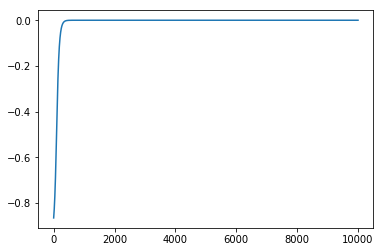

In [115]:
plt.plot(epoc_val,error_log)
plt.show()

In [138]:
print(net)
def predict(net,x):
    for j in range (len(net)):
        Layer=net[j]
        Prev_Layer=net[j-1]
        if Layer['Layer']=='Input':
            Layer['val']=x
        else:
            val=np.dot(Layer['weight'],Prev_Layer['val'])
            val=sigmoid(val)
            Layer['val']=val
        if Layer['Layer']=='Output':
            return Layer['val']
print(predict(net,[0,1]))
print(Y)

[{'val': [1, 0], 'Layer': 'Input'}, {'delta': array([-0.00081763, -0.00081763, -0.00081763]), 'weight': array([[1.03363759, 0.94027708],
       [1.03363759, 0.94027708],
       [1.03363759, 0.94027708]]), 'val': array([0.73762051, 0.73762051, 0.73762051]), 'Layer': 'Hidden_one'}, {'delta': array([-0.1296502,  0.1296502]), 'weight': array([[ 0.02375382,  0.02375382,  0.02375382],
       [-0.02375382, -0.02375382, -0.02375382]]), 'val': array([0.51313795, 0.48686205]), 'Layer': 'Output'}]
[0.51280922 0.48719078]
[[0 1]
 [1 0]
 [1 0]
 [0 1]]


c:\python35\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


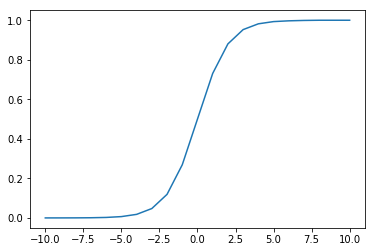

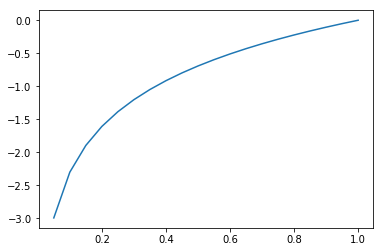

In [27]:
x=np.ones((21),np.int8)
for i in range(0,21):
    x[i]=i-10
y=np.exp(-1*x)
y=1+y
y=1/y
p=(x+10)/20
z=np.log(p)
print(x)
plt.plot(x,y)
plt.show()
plt.plot(p,z)
plt.show()